In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
import math

In [181]:
filename = '0e947f19f6214fd2a5ef99f6b9a56c41.xls'
df = pd.read_excel(filename)
df.shape

(2482, 22)

In [182]:
len(set(df['datetime']))

381

In [183]:
#df['start_address_name'].value_counts()

In [184]:
address_gps = []
address_gps.append(df.iloc[0]['start_gps_poi'])
for i in range(1,df.shape[0]):
    if df.iloc[i]['datetime'] != df.iloc[i-1]['datetime']:
        address_gps.append(df.iloc[i]['start_gps_poi'])
        address_gps.append(df.iloc[i-1]['end_gps_poi'])
address_gps.append(df.iloc[df.shape[0]-1]['end_gps_poi'])

In [185]:
len(address_gps)

762

In [142]:
pointsList = []
for item in address_gps:
    point = []
    point.append(float(item.split(',')[0]))
    point.append(float(item.split(',')[1]))
    pointsList.append(point)          

In [143]:
xy = np.array(pointsList)
#xy[:,0]
xy

array([[120.043    ,  29.3633333],
       [120.1205   ,  29.3388333],
       [120.12     ,  29.3388333],
       ...,
       [120.1203333,  29.3388333],
       [120.12     ,  29.3388333],
       [120.0346666,  29.3353333]])

In [167]:
pointsList


[[120.043, 29.363333299999994],
 [120.12049999999999, 29.338833300000005],
 [120.12, 29.338833300000005],
 [120.08333329999999, 29.313500000000005],
 [120.08333329999999, 29.313500000000005],
 [120.25333330000001, 30.007666599999993],
 [120.2538333, 30.007833299999987],
 [120.12049999999999, 29.3391666],
 [120.1201666, 29.339333299999993],
 [120.08316660000003, 29.313500000000005],
 [120.08316660000003, 29.313500000000005],
 [120.08316660000003, 29.313500000000005],
 [120.08333329999999, 29.313500000000005],
 [120.12049999999999, 29.339],
 [120.1201666, 29.338833300000005],
 [120.12066659999999, 29.33850000000001],
 [120.1201666, 29.338833300000005],
 [120.12049999999999, 29.338833300000005],
 [120.1201666, 29.338833300000005],
 [120.25483329999997, 30.007499999999993],
 [120.255, 30.007499999999993],
 [120.1201666, 29.338833300000005],
 [120.11966660000002, 29.3391666],
 [120.1201666, 29.339],
 [120.12049999999999, 29.339],
 [120.12049999999999, 29.339],
 [120.1201666, 29.338833300000

In [144]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
#X
# X.describe()

In [145]:
# kmeans = KMeans(n_clusters = 3)
# re = kmeans.fit(xy)

In [146]:
#re.labels_

In [147]:
#dir(re)

In [148]:
fig =plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

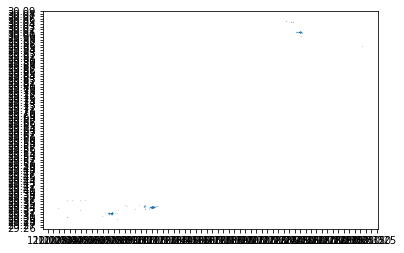

In [149]:
plt.scatter(xy[:,0],xy[:,1],s=0.01)
plt.locator_params(nbins = 100)

In [150]:
def haversine(lonlat1, lonlat2):
    lon1, lat1  = lonlat1
    lon2, lat2= lonlat2
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1000


In [151]:
haversine([116.456, 39.921],[116.456, 39.920])

111.19492664426889

In [152]:
Y=[[1.001,2.000],[1.002,2.000],[1.003,2.000],[1.003,2.000]]
squareform(pdist(Y, (lambda u, v: haversine(u, v))))

array([[  0.       , 111.1271897, 222.2543794, 222.2543794],
       [111.1271897,   0.       , 111.1271897, 111.1271897],
       [222.2543794, 111.1271897,   0.       ,   0.       ],
       [222.2543794, 111.1271897,   0.       ,   0.       ]])

In [153]:
X = pd.DataFrame(
        {
         "lng": xy[:,0],
         "lat": xy[:,1]
        })
def clustering_by_dbscan():
    
    distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
    # 2代表两公里  
    db = DBSCAN(eps=100, min_samples=15, metric='precomputed')  
    y_db = db.fit_predict(distance_matrix)
    X['cluster'] = y_db
    plt.scatter(X['lng'], X['lat'], c=X['cluster'])
    plt.show()
#X['cluster'].value_counts()


In [154]:
X.head()

,lng,lat
0,120.043000,29.363333
1,120.120500,29.338833
2,120.120000,29.338833
3,120.083333,29.313500
4,120.083333,29.313500


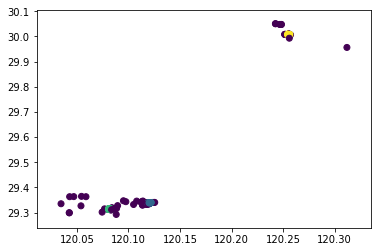

In [155]:
clustering_by_dbscan()

In [172]:
cluster = X['cluster'].value_counts().keys()[0]
cluster

0

In [173]:
X['cluster'].value_counts()


 0    554
 2     80
-1     65
 1     63
Name: cluster, dtype: int64

In [176]:
X['cluster'].value_counts().values[0]/X.shape[0]

0.7270341207349081

In [164]:
X[X['cluster'] == cluster][:10]

,lng,lat,cluster
1,120.120500,29.338833,0
2,120.120000,29.338833,0
7,120.120500,29.339167,0
8,120.120167,29.339333,0
13,120.120500,29.339000,0
14,120.120167,29.338833,0
15,120.120667,29.338500,0
16,120.120167,29.338833,0
17,120.120500,29.338833,0
18,120.120167,29.338833,0


In [165]:
X[X['cluster'] == cluster]['lng'].mean()

120.12023642545125

In [166]:
X[X['cluster'] == cluster]['lat'].mean()

29.338787571119134

In [195]:
120.12049999999999,29.338833300000005

(120.12049999999999, 29.338833300000005)

In [196]:
X

,lng,lat,cluster
0,120.043000,29.363333,-1
1,120.120500,29.338833,0
2,120.120000,29.338833,0
3,120.083333,29.313500,1
4,120.083333,29.313500,1
5,120.253333,30.007667,2
6,120.253833,30.007833,2
7,120.120500,29.339167,0
8,120.120167,29.339333,0
9,120.083167,29.313500,1
